In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
cab_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
customer_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
transaction_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')
city_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')

In [3]:
cab_data.drop_duplicates(inplace=True)
customer_data.drop_duplicates(inplace=True)
transaction_data.drop_duplicates(inplace=True)
city_data.drop_duplicates(inplace=True)

In [4]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [8]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 21.9+ MB


In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.9+ MB


In [10]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 13.4+ MB


In [11]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 640.0+ bytes


In [4]:
merged_data = transaction_data.merge(customer_data, on='Customer ID')
merged_data = merged_data.merge(cab_data, on='Transaction ID')
merged_data = merged_data.merge(city_data, on='City')
merged_data.head

<bound method NDFrame.head of         Transaction ID  Customer ID Payment_Mode  Gender  Age  \
0             10000011        29290         Card    Male   28   
1             10351127        29290         Cash    Male   28   
2             10412921        29290         Card    Male   28   
3             10000012        27703         Card    Male   27   
4             10320494        27703         Card    Male   27   
...                ...          ...          ...     ...  ...   
359387        10307228        51406         Cash  Female   29   
359388        10319775        51406         Cash  Female   29   
359389        10347676        51406         Card  Female   29   
359390        10358624        51406         Cash  Female   29   
359391        10370709        51406         Card  Female   29   

        Income (USD/Month)  Date of Travel     Company           City  \
0                    10813           42377    Pink Cab     ATLANTA GA   
1                    10813           43302 

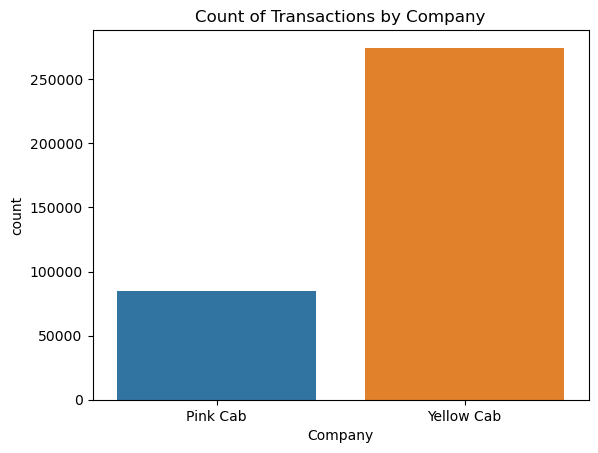

In [13]:
# Hypothesis 1: There is significant difference between the number transactions in 2 companies.
# Which compant has more customers? -- Yellow Cab 
sns.countplot(x='Company', data=merged_data)
plt.title('Count of Transactions by Company')
plt.show()

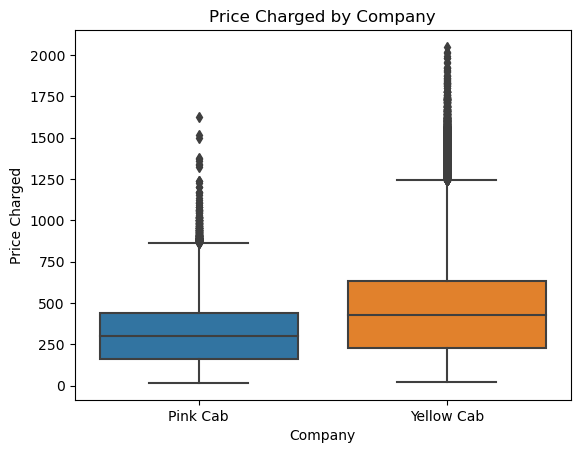

In [22]:
# Hypothesis 1.1 Price different may be a cause of transactions different
# Yellow Cab generally charge more
sns.boxplot(x='Company', y='Price Charged', data=merged_data)
plt.title('Price Charged by Company')
plt.show()

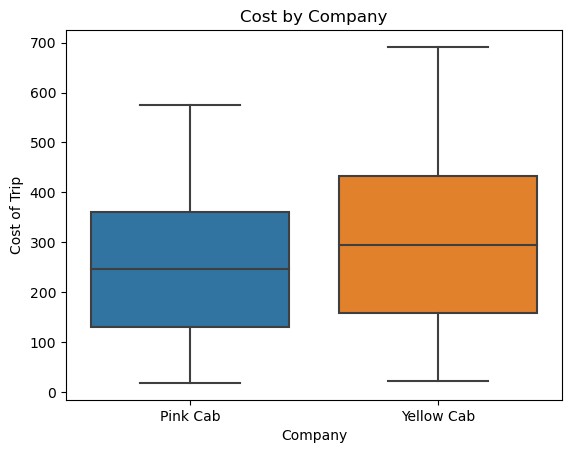

In [27]:
# Hypothesis 1.2 Cost different may be a cause of transactions different
# Yellow Cab generally cost more for one trip but the difference is less significant than price
sns.boxplot(x='Company', y='Cost of Trip', data=merged_data)
plt.title('Cost by Company')
plt.show()

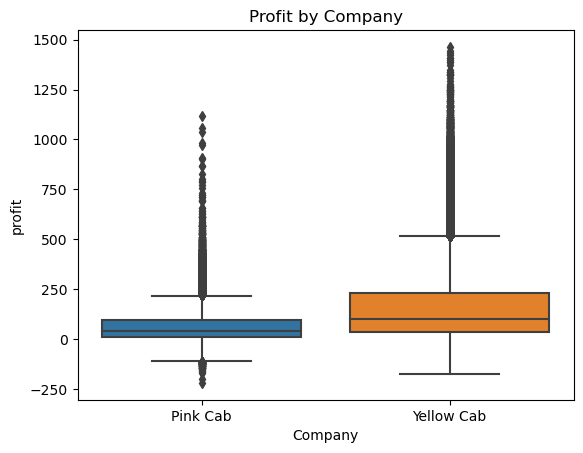

In [44]:
# Hypothesis 1.3: There is significant difference between the avenue in 2 companies.
# Yellow Cab profit more per trip
merged_data['profit'] = merged_data['Price Charged'] - merged_data['Cost of Trip']
sns.boxplot(x='Company', y='profit', data=merged_data)
plt.title('Profit by Company')
plt.show()

In [ ]:
# Hypothesis 2: There is one payment mode that is more popular than the other one
# Group data by company and city, and calculate the number of unique customers
payment_wise = merged_data.groupby(['Company', 'Payment_Mode'])['Transaction ID'].count().reset_index()

# Create a bar plot to visualize city-wise cab users covered by each company
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment_Mode', y='Transaction ID', hue='Company', data=payment_wise)
plt.xlabel('Payment_Mode')
plt.ylabel('Number of Transactions')
plt.title('City-wise Payment Mode Covered by Each Company')
plt.legend(title='Company')

plt.tight_layout()
plt.show()

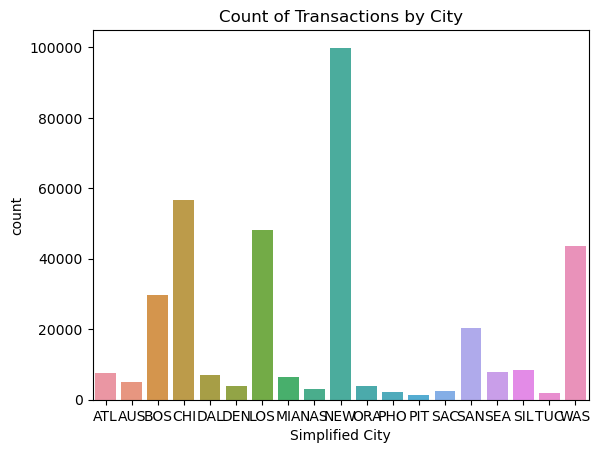

In [37]:
# Hypothesis 3: There is significant difference between the number transactions in different cities.
# New York, Washington, Los Angle, Chicago and Boston are main markets
merged_data['Simplified City'] = merged_data['City'].str.slice(stop=3)
sns.countplot(x='Simplified City', data=merged_data)
plt.title('Count of Transactions by City')
plt.show()

In [38]:
merged_data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

Text(0.5, 1.0, 'Average Profit of Trip by Company')

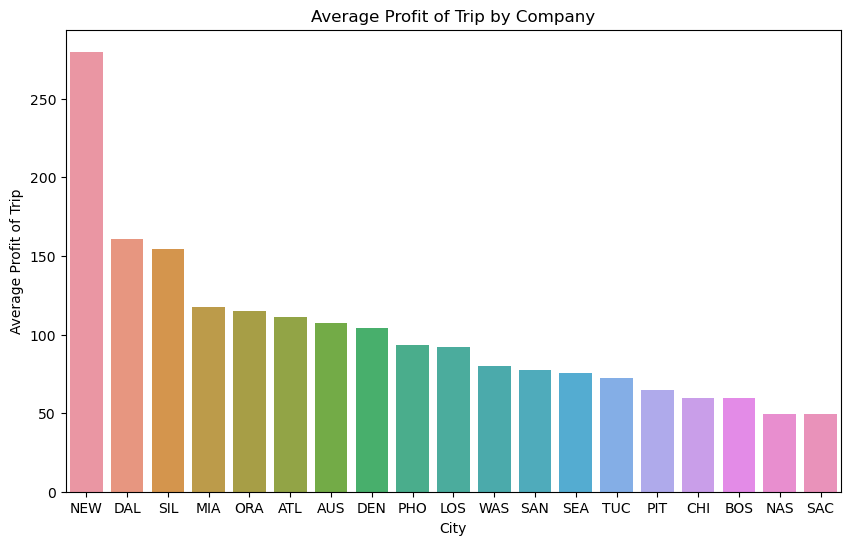

In [45]:
# Hypothesis 4: Profit per trip are different with cities
city_avg_profit = merged_data.groupby('Simplified City')['profit'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=city_avg_profit.index, y=city_avg_profit.values)
plt.xlabel('City')
plt.ylabel('Average Profit of Trip')
plt.title('Average Profit of Trip by Company')

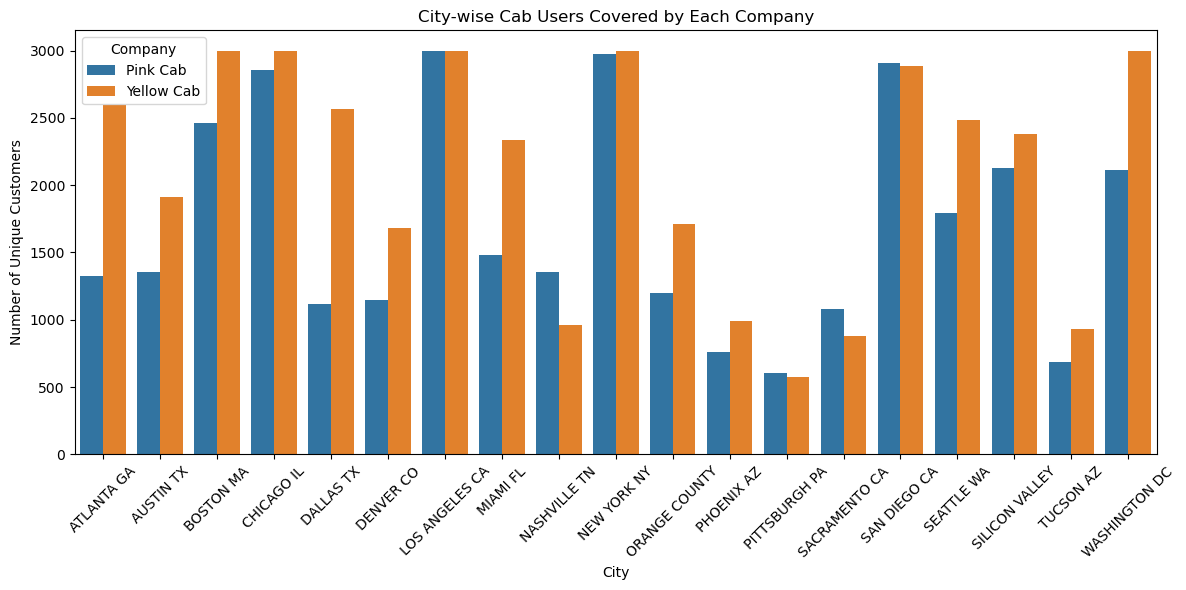

In [43]:
# Group data by company and city, and calculate the number of unique customers
city_wise_customers = merged_data.groupby(['Company', 'City'])['Customer ID'].nunique().reset_index()

# Create a bar plot to visualize city-wise cab users covered by each company
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Customer ID', hue='Company', data=city_wise_customers)
plt.xlabel('City')
plt.ylabel('Number of Unique Customers')
plt.title('City-wise Cab Users Covered by Each Company')
plt.legend(title='Company')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

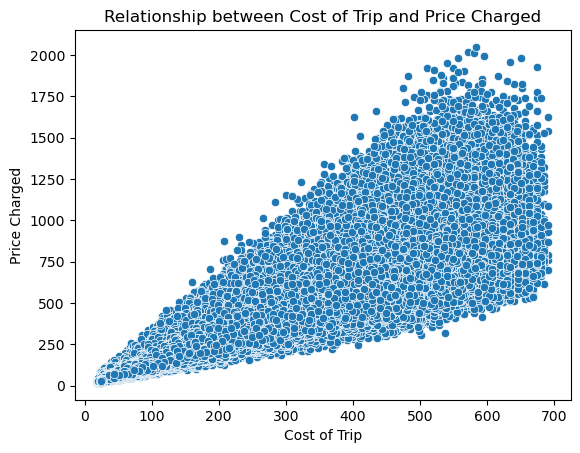

In [36]:
# Hypothesis 5: There is positive linear corelation bewteen Cost of Trip and Price Charged
sns.scatterplot(x='Cost of Trip', y='Price Charged', data=merged_data)
plt.title('Relationship between Cost of Trip and Price Charged')
plt.show()

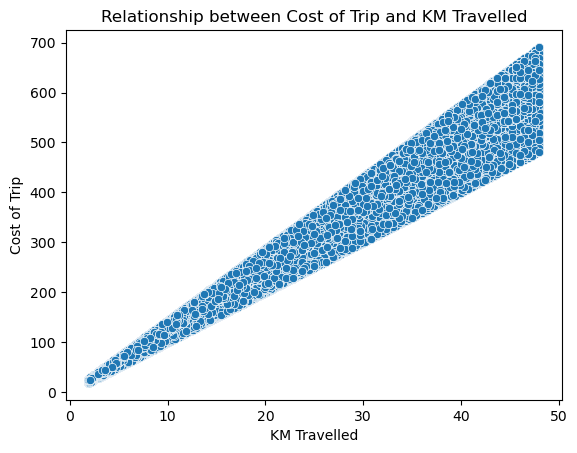

In [14]:
# Hypothesis 6: There is positive linear corelation bewteen Cost of Trip and KM Travelled
sns.scatterplot(x='KM Travelled', y='Cost of Trip', data=merged_data)
plt.title('Relationship between Cost of Trip and KM Travelled')
plt.show()

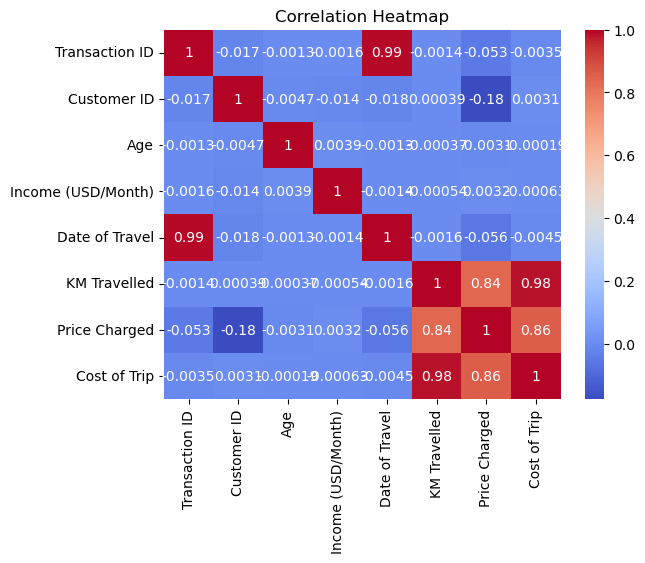

In [39]:
# Correlation heatmap
corr_matrix = merged_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Convert numerical values in "Date of Travel" column to pandas datetime objects
merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'], origin='1899-12-30', unit='D')

# Extract the year and month from the "Date of Travel" column
merged_data['Year'] = merged_data['Date of Travel'].dt.year
merged_data['Month'] = merged_data['Date of Travel'].dt.month

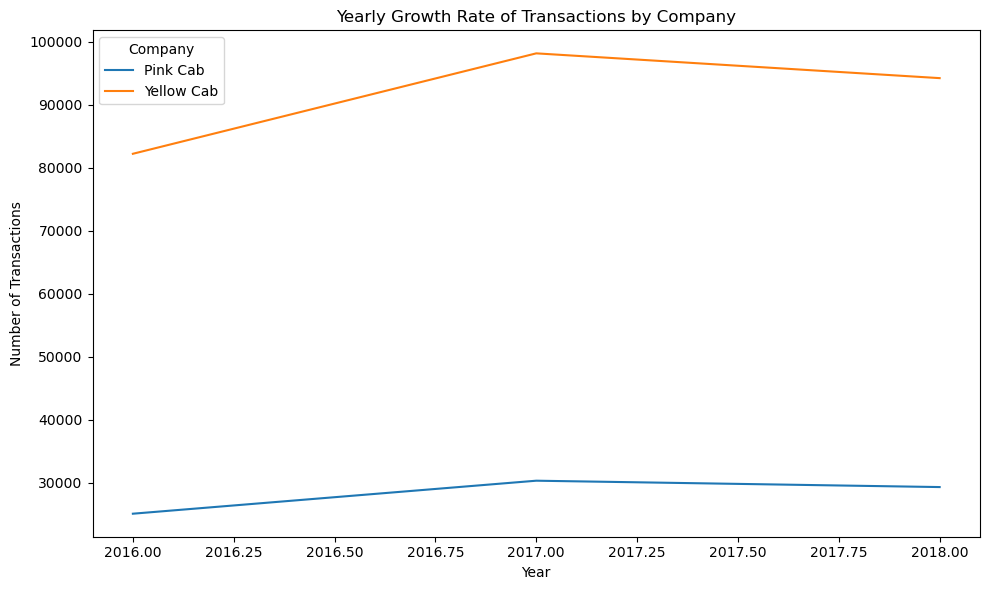

In [6]:
# Group data by company and year, and calculate the number of transactions
company_yearly_transactions = merged_data.groupby(['Company', 'Year'])['Transaction ID'].count().reset_index()

# Create a line plot to compare the yearly growth rate of transactions for the two companies
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Transaction ID', hue='Company', data=company_yearly_transactions)
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Yearly Growth Rate of Transactions by Company')
plt.legend(title='Company')

plt.tight_layout()
plt.show()

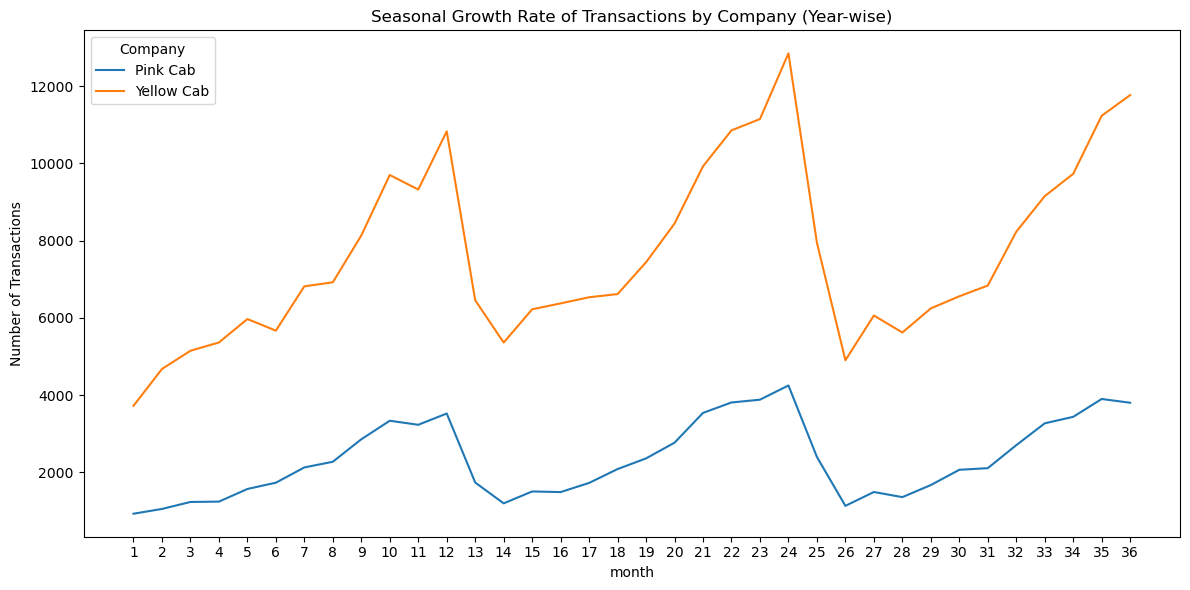

In [23]:
# Group data by company, year, and month, and calculate the number of transactions
company_monthly_transactions = merged_data.groupby(['Company', 'Year', 'Month'])['Transaction ID'].count().reset_index()

# 
month = [x for x in range(1, 37)] + [x for x in range(1, 37)]
company_monthly_transactions['#month'] = month

# Create a line plot to compare the seasonal growth rate of transactions for the two companies
plt.figure(figsize=(12, 6))
sns.lineplot(x='#month', y='Transaction ID', hue='Company', data=company_monthly_transactions)
plt.xlabel('month')
plt.ylabel('Number of Transactions')
plt.title('Seasonal Growth Rate of Transactions by Company (Year-wise)')
plt.legend(title='Company', labels=['Pink Cab', 'Yellow Cab'])

# Set x-axis labels to month names
month_names = [x for x in range(1,37)] 
plt.xticks(range(1, 37), month_names)

plt.tight_layout()
plt.show()